In [7]:
# %pip install -r requirements.txt
%pip install pandas

  Using cached pandas-2.1.3-cp311-cp311-win_amd64.whl.metadata (18 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Using cached pandas-2.1.3-cp311-cp311-win_amd64.whl (10.6 MB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
Note: you may need to restart the kernel to use updated packages.


              barcode  present  xgrad  ygrad     x     y
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174
1  TACCGATCCAACACTT-1        0      1      1  2630  2243
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450


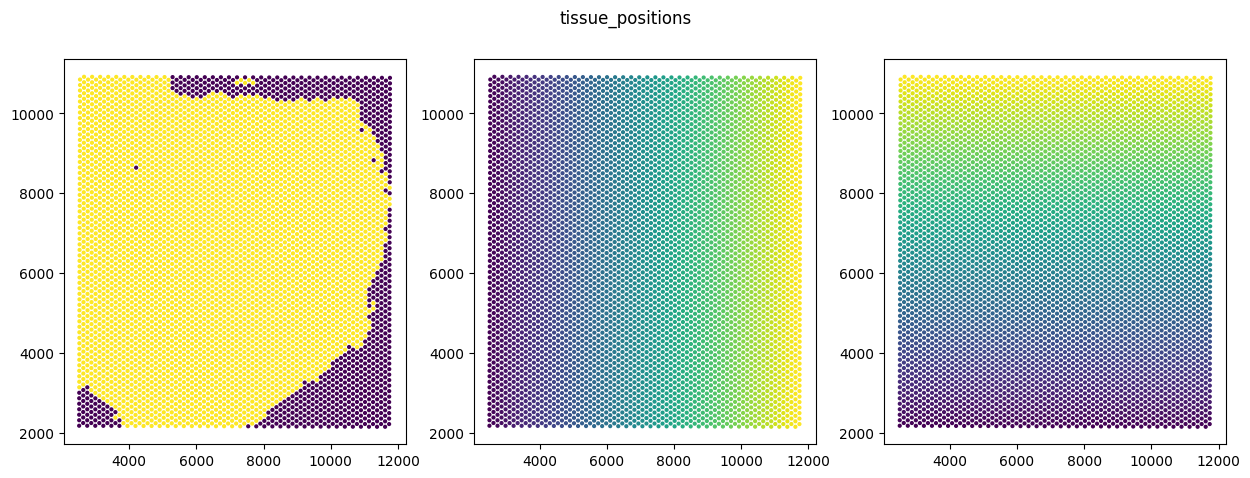

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Read the CSV file and create a dataframe
df = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
# Display the dataframe
print(df.head())
#display the 3 graps of the dataframe
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('tissue_positions')
ax1.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present']), cmap = 'viridis', s = 4)
ax2.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['xgrad']), cmap = 'viridis', s = 4)
ax3.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['ygrad']), cmap = 'viridis', s = 4)
plt.show()

              barcode layer_guess
0  AAACAACGAATAGTTC-1          -1
1  AAACAAGTATCTCCCA-1          L3
2  AAACAATCTACTAGCA-1          L1
3  AAACACCAATAACTGC-1          WM
4  AAACAGCTTTCAGAAG-1          L6
              barcode  present  xgrad  ygrad     x     y
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174
1  TACCGATCCAACACTT-1        0      1      1  2630  2243
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450
{'-1', 'L1', 'L3', 'L6', 'L2', 'L5', 'WM', 'L4'}
              barcode  present  xgrad  ygrad     x     y layer_guess
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174         NaN
1  TACCGATCCAACACTT-1        0      1      1  2630  2243         NaN
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312         NaN
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381         NaN
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450    

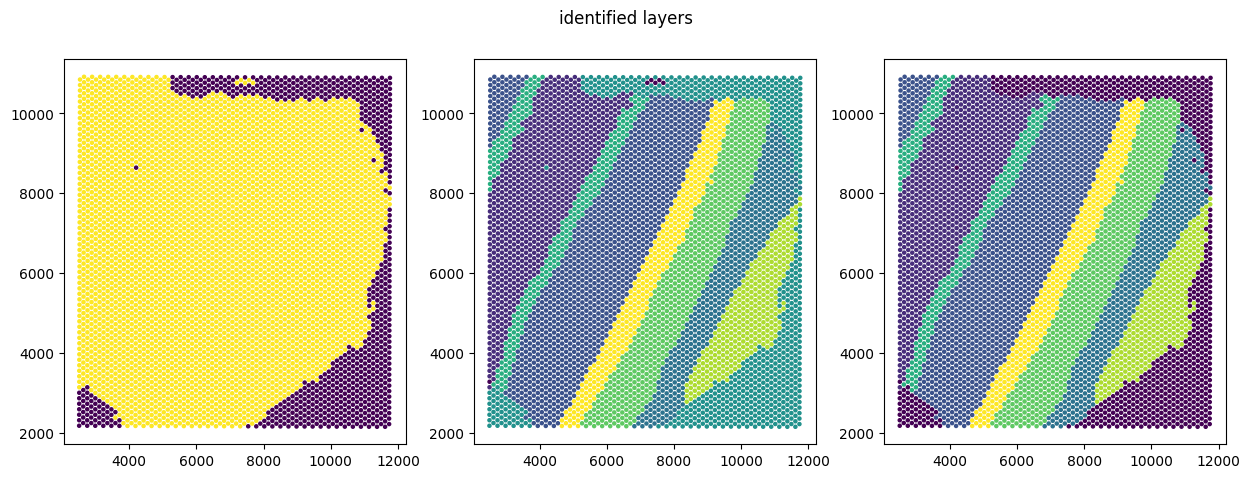

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Read the CSV file and create a dataframe
df = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
# metadata = 'data\data1\metadata.tsv'
metadata = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
# Display the dataframe
print(metadata.head())
print(df.head())
layers = set(metadata['layer_guess'])
print(layers)

#if barcode in df['barcode'] matches a barcode in metadata['barcode'], then add the meta['layer_guess'] to df['layer_guess'] else put NAN
df['layer_guess'] = df['barcode'].apply(lambda x: metadata['layer_guess'][metadata['barcode'] == x].values[0] if x in metadata['barcode'].values else np.nan)
#assign a df['color'] to each in set(df['layer_guess'])
colors = set(df['layer_guess'])
print(df.head())
print(colors)
df['color'] = df['layer_guess'].apply(lambda x: list(colors).index(x))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('identified layers')
ax1.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present']), cmap = 'viridis', s = 5)
ax2.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['color']), cmap = 'viridis', s = 5)
ax3.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present'])*np.array(df['color']), cmap = 'viridis', s = 5)
plt.show()

In [104]:
print(set(df['layer_guess']))

{'-1', 'L1', 'L3', 'L6', nan, 'L2', 'L5', 'WM', 'L4'}
